# Introduction

The data for this project comes from the OkCupid app. This is an online dating service, where users enter basic information about themselves and answer several multiple choice questions so that they can be matched to other users.

The goal of this project is to first review and clean the data, determine what data is available, and create a machine learning model to attempt matching users.

The data is provided from OkCupid and Codecademy as `profiles.csv`.

# Project Scoping

The next sections describe the project scope and are to be used to guide the process.

### Project Goals

Take existing data from the OkCupid app and create a machine learning model to make predictions about users. In the real world, machine learning will make multiple predictions of each user's compatibility with other users and suggest matches. In this case, the specific goal is to see if a machine learning model can correctly predict a user's religious belief based on all other data. 

### Data

Data from OkCupid is provided in `profiles.csv`. The sections below go into more detail about the data: the number of users and their responses to multiple choice and short answer questions.

### Analysis

The analysis will include visualizations of the data, distribution and counts of variables, and relationships between variables. Then a model will be created using classification algorithms and supervised machine learning to predict a user's religiuos belief.

### Evaluation

THe model will then be evaluated with a validation data set, and predictions checked using a confusion matrix, and accuracy, precision, recall, F1, and Kappa.







## Import Python Modules 

Includes initial modules expected to be utilized.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from decimal import Decimal


## Load Data and Review 

Data from `profiles.csv` read into a dataframe called `profiles`. Then initial data reviewed using `.head()`. 

In [3]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location  \
0  south san francisco, california   
1              oakland, california   
2        san francisco, california   
3             berkeley, california   
4        san francisco, california   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                           NaN    straight   
3                       doesn&rsquo;t want kids    straight   
4                                           NaN    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                                       NaN   m   
3                 likes cats                                       NaN   m   
4  likes dogs and likes cats                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single  

[5 rows x 31 columns]

In [4]:
profiles.shape

(59946, 31)

In [5]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [6]:
profiles.age.dtypes

dtype('int64')

### Data Summary

From `profiles.shape` there are almost 60k rows (i.e. unique users) with 31 columns. 

The dataset column titles from `profiles.columns` are:

- **age:** continuous variable in years (int64)
- **body_type:** categorical variable 
- **diet:** categorical variable
- **drinks:** categorical variable (alcohol consumption)
- **drugs:** categorical variable (drug usage)
- **education:** categorical variable

- **essay0:** "My self summary"
- **essay1:** "What I'm doing with my life"
- **essay2:** "What I'm really good at"
- **essay3:** "The first thing people notice about me"
- **essay4:** "Favorite books, movies, shows, music, and food"
- **essay5:** "The six things I could never do without"
- **essay6:** "I spend a lot of time thinking about..."
- **essay7:** "On a typical Friday night I am..."
- **essay8:** "The most private thing I am willing to admit"
- **essay9:** "You should message me if..."

- **ethnicity:** categorical variable
- **height:** continuous variable in inches (float64)
- **income:** continuous variable in USD assumed (int64)
- **job:** categorical variable (by inspection, from dropdown menu) 
- **last_online:** categorical variable
- **location:** categorical variable
- **offspring:** categorical variable
- **orientation:** categorical variable
- **pets:** categorical variable
- **religion:** categorical variable
- **sex:** categorical variable
- **sign:** categorical variable
- **smokes:** categorical variable
- **speaks:** categorical variable
- **status:** categorical variable


## Explore the data

For all columns with continuous variables, explore the number of unique responses and in some cases list those. A method is provided here to give data on all column at once. It will alphabetize the list when sorting (removing NaN first...)

In [7]:
object_cols = []
for column in profiles.columns:
    if profiles[column].dtypes == 'object':
        object_cols.append(column)
        print(f'Column {column.upper()} has {profiles[column].nunique()} categories')   
        

Column BODY_TYPE has 12 categories
Column DIET has 18 categories
Column DRINKS has 6 categories
Column DRUGS has 3 categories
Column EDUCATION has 32 categories
Column ESSAY0 has 54350 categories
Column ESSAY1 has 51516 categories
Column ESSAY2 has 48635 categories
Column ESSAY3 has 43533 categories
Column ESSAY4 has 49260 categories
Column ESSAY5 has 48963 categories
Column ESSAY6 has 43603 categories
Column ESSAY7 has 45554 categories
Column ESSAY8 has 39324 categories
Column ESSAY9 has 45443 categories
Column ETHNICITY has 217 categories
Column JOB has 21 categories
Column LAST_ONLINE has 30123 categories
Column LOCATION has 199 categories
Column OFFSPRING has 15 categories
Column ORIENTATION has 3 categories
Column PETS has 15 categories
Column RELIGION has 45 categories
Column SEX has 2 categories
Column SIGN has 48 categories
Column SMOKES has 5 categories
Column SPEAKS has 7647 categories
Column STATUS has 5 categories


Next, a method is provided to permit review of unique responses for each column invidually. This will give an idea of the scope of data, which variables need to be cleaned and/or regrouped to suit the project requirements, etc.

In [8]:
def unique_entries(column):
    len_pre_nan = profiles[column].isnull().sum()
    clean_column = profiles[column].dropna()
    len_post = len(clean_column)
    col_entries = list(clean_column.unique())
    print(f'For column {column.upper()}, {len_post} entries remain after {len_pre_nan} NaNs deleted.')
    print(sorted(col_entries))

    
def unique_list(column):
    clean_column = profiles[column].dropna()
    col_entries = list(clean_column.unique())
    return col_entries


In [9]:
# unique_entries('body_type')

In [277]:
unique_entries('diet')

For column DIET, 35551 entries remain after 24395 NaNs deleted.
['anything', 'halal', 'kosher', 'mostly anything', 'mostly halal', 'mostly kosher', 'mostly other', 'mostly vegan', 'mostly vegetarian', 'other', 'strictly anything', 'strictly halal', 'strictly kosher', 'strictly other', 'strictly vegan', 'strictly vegetarian', 'vegan', 'vegetarian']


In [11]:
# unique_entries('drinks')

In [12]:
# unique_entries('drugs')

In [62]:
# unique_entries('ethnicity')

In [14]:
# unique_entries('education')

In [15]:
# unique_entries('job')

In [151]:
# unique_entries('income')

In [16]:
# unique_entries('location')

In [17]:
# unique_entries('offspring')

In [18]:
# unique_entries('pets')

In [19]:
# unique_enatries('sex')

In [20]:
# unique_entries('religion')

In [76]:
unique_entries('sign')

For column SIGN, 48890 entries remain after 11056 NaNs deleted.
['aquarius', 'aquarius and it matters a lot', 'aquarius and it&rsquo;s fun to think about', 'aquarius but it doesn&rsquo;t matter', 'aries', 'aries and it matters a lot', 'aries and it&rsquo;s fun to think about', 'aries but it doesn&rsquo;t matter', 'cancer', 'cancer and it matters a lot', 'cancer and it&rsquo;s fun to think about', 'cancer but it doesn&rsquo;t matter', 'capricorn', 'capricorn and it matters a lot', 'capricorn and it&rsquo;s fun to think about', 'capricorn but it doesn&rsquo;t matter', 'gemini', 'gemini and it matters a lot', 'gemini and it&rsquo;s fun to think about', 'gemini but it doesn&rsquo;t matter', 'leo', 'leo and it matters a lot', 'leo and it&rsquo;s fun to think about', 'leo but it doesn&rsquo;t matter', 'libra', 'libra and it matters a lot', 'libra and it&rsquo;s fun to think about', 'libra but it doesn&rsquo;t matter', 'pisces', 'pisces and it matters a lot', 'pisces and it&rsquo;s fun to thi

In [22]:
# unique_entries('speaks')

## Preliminary Observations of Data

- Many columns such as `ethnicity`, `location`, `religion`, `sign` and `speaks` include large amounts of data that can be regrouped for clarity. Using a Bag of Words counter, it may be seen that in each of these cases terms are being repeated.
- The column for `location` may be split into city and state/country. A casual look at the data seems to indicate that there is a huge proportion of users from California. 


# Exploration of Variables in More Detail

### Religion, Drugs, Drinks, and Smokes 

These four variables will be explored together, culminating in a Chi Square test to explore preliminary relationsips.

#### Chi-Square Test

Analysis of significant association between variables.
 
- **Goal** Analysis of whether there is a relationship between how religious one describes oneself and self-described drug use and drinking.
- **Data** The data tables include the `religion`, `drugs`, `drinks`, and `smokes` columns.  
- **Process** The `religion` column will be divided into more strongly affiliated and less strongly affiliated with a belief.  The `drugs`, `drinks`, and `smokes` columns will be ordered and cleaned.
   - For religion: the new column will be `beliefs`. The entries '...and very serious about it', '...and somewhat serious about it', and the belief itself are to be categorized as 'strong belief'. Otherwise, the entries '...and not too serious about it', '...and laughing about it' are to be categorized as 'low belief'. 

In [23]:
# Drop null values from the following columns
profiles_rel = profiles.dropna(subset=['religion', 'drinks', 'drugs', 'smokes']).copy()
print(profiles_rel.shape)

# This function and the lambda immediately below create column 'belief' 
def check_for_text(str):
#     if (str.__contains__('not too') | str.__contains__('laughing')):
    if (str.__contains__('somewhat') | str.__contains__('very')):
        return True

profiles_rel['belief'] = profiles_rel.apply(lambda row: 'low belief' if check_for_text(row['religion']) else 'high belief', axis = 1)

# Sort the sortable categoricals: For 'religion', alphabetize then sort based on seriousness of belief. For the others, sort for
# how often the user drinks, uses drugs, or smokes.
profiles_rel['religion'] = pd.Categorical(profiles_rel['religion'],\
                        ['agnosticism and laughing about it',  'agnosticism but not too serious about it', \
                         'agnosticism', 'agnosticism and somewhat serious about it', 'agnosticism and very serious about it', \
                         'atheism and laughing about it', 'atheism but not too serious about it', \
                         'atheism', 'atheism and somewhat serious about it', 'atheism and very serious about it',  \
                         'buddhism and laughing about it', 'buddhism but not too serious about it', \
                         'buddhism', 'buddhism and somewhat serious about it', 'buddhism and very serious about it', \
                         'catholicism and laughing about it', 'catholicism but not too serious about it', \
                         'catholicism', 'catholicism and somewhat serious about it', 'catholicism and very serious about it', \
                         'christianity and laughing about it', 'christianity but not too serious about it',\
                         'christianity', 'christianity and somewhat serious about it', 'christianity and very serious about it',\
                         'hinduism and laughing about it', 'hinduism but not too serious about it', \
                         'hinduism', 'hinduism and somewhat serious about it', 'hinduism and very serious about it', \
                         'islam and laughing about it', 'islam but not too serious about it', \
                         'islam', 'islam and somewhat serious about it', 'islam and very serious about it', \
                         'judaism and laughing about it', 'judaism but not too serious about it', \
                         'judaism', 'judaism and somewhat serious about it', 'judaism and very serious about it', \
                         'other and laughing about it', 'other but not too serious about it', \
                         'other', 'other and somewhat serious about it', 'other and very serious about it'], ordered=True)
profiles_rel['drugs'] = pd.Categorical(profiles_rel['drugs'], ['never', 'sometimes', 'often'], ordered=True)
profiles_rel['drinks'] = pd.Categorical(profiles_rel['drinks'], ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], ordered=True)
profiles_rel['smokes'] = pd.Categorical(profiles_rel['smokes'], ['no', 'sometimes', 'when drinking', 'trying to quit', 'yes'], ordered=True)

from scipy.stats import chi2_contingency

ab_contingency = pd.crosstab(profiles_rel['drugs'], profiles_rel['belief'])
print(ab_contingency)
chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval)


(30094, 31)
belief     high belief  low belief
drugs                             
never            19802        4371
sometimes         4595        1033
often              208          85
8.965022305044359e-06


#### Chi-Square Results

- **Conclusions** Comparing `belief` to `drugs`, `drinks`, and `smokes` pval suggests a correlation. As a test, comparing `religion` to `belief` shows pval = 0, or as expected no correlation. 

### Religion

From the chi-square test above 53% of respondents describe their belief of choice as not very serious, while around 29% simply state a belief, and the remaining 18% are more serious about their belief. Per the plot below, for most of the individual beliefs '{belief} but not too serious about it' is the main choice of users. Agnosticism and Atheism are 37.5% of the population, Christianity and Catholicism are 29.6%, Judaism, Buddhism, Hinduism, and Islam are about 14.6%, and Other the remaining 19.2%.

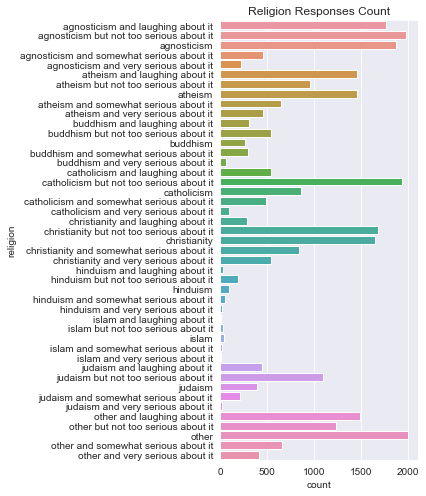

In [24]:
fig = plt.figure(figsize=(6,7))
sns.set_style('darkgrid')
sns.countplot(data=profiles_rel, y='religion')
plt.title('Religion Responses Count')
fig.tight_layout()
plt.savefig('religions.png')

In [25]:
# Count totals for each belief
profiles_rel['belief_overall'] = profiles_rel.religion.str.split().str.get(0)
beliefs_overall = profiles_rel['belief_overall'].value_counts().sort_index().to_frame().reset_index()
beliefs_overall.columns = ['belief', 'count']
beliefs_overall['percent'] = beliefs_overall['count'].apply(lambda x: x/ len(profiles_rel['belief_overall'])*100)

print((beliefs_overall))


         belief  count    percent
0   agnosticism   6307  20.957666
1       atheism   4968  16.508274
2      buddhism   1464   4.864757
3   catholicism   3920  13.025852
4  christianity   4996  16.601316
5      hinduism    375   1.246096
6         islam    110   0.365521
7       judaism   2156   7.164219
8         other   5798  19.266299


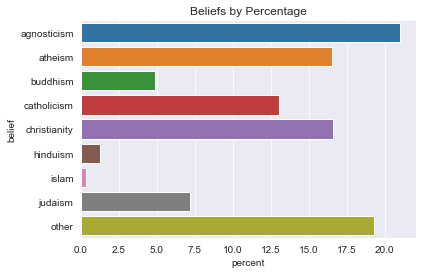

In [26]:
sns.barplot(x=beliefs_overall['percent'], y=beliefs_overall['belief'])
plt.title('Beliefs by Percentage')
plt.savefig('belief_overall.png')
plt.show()

### Drugs

The vast majority of respondents (80%) report that they do not use drugs.

       index     drugs    percent
0      never  0.803250  80.324982
1  sometimes  0.187014  18.701402
2      often  0.009736   0.973616


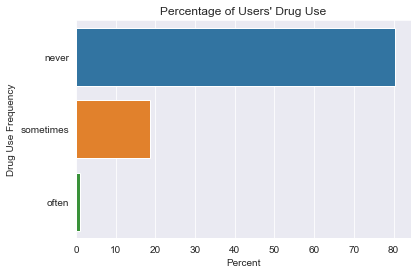

In [27]:
drug_counts = profiles_rel['drugs'].value_counts(normalize=True).reset_index()
drug_counts['percent'] = drug_counts.apply(lambda row: row['drugs']*100, axis =1)
print(drug_counts)

sns.barplot(data=drug_counts, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Drug Use Frequency')
plt.title('Percentage of Users\' Drug Use')
plt.savefig('drug_use.png')

### Drinks

Around 69% of respondents say that they drink 'socially', a little over 10% drink more often, almost 13% drink 'rarely', and almost 8% do not drink at all.

         index    drinks    percent
0     socially  0.691600  69.159965
1       rarely  0.127235  12.723466
2        often  0.088556   8.855586
3   not at all  0.077324   7.732438
4   very often  0.009603   0.960324
5  desperately  0.005682   0.568220


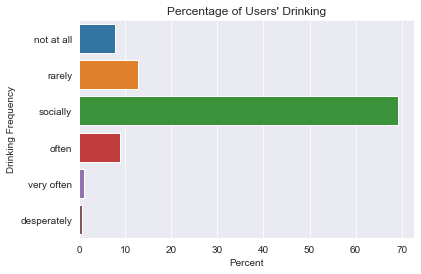

In [28]:
drink_counts = profiles_rel['drinks'].value_counts(normalize=True).reset_index()
drink_counts['percent'] = drink_counts.apply(lambda row: row['drinks']*100, axis =1)
print(drink_counts)

sns.barplot(data=drink_counts, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Drinking Frequency')
plt.title('Percentage of Users\' Drinking')
plt.savefig('drinking.png')

### Smokes

The vast majority of respondents (81%) say that they do not smoke at all.

            index    smokes    percent
0              no  0.810128  81.012826
1       sometimes  0.067655   6.765468
2   when drinking  0.052402   5.240247
3             yes  0.041968   4.196850
4  trying to quit  0.027846   2.784608


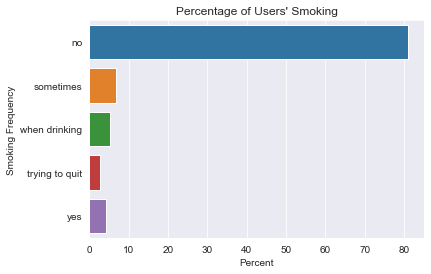

In [29]:
smoke_counts = profiles_rel['smokes'].value_counts(normalize=True).reset_index()
smoke_counts['percent'] = smoke_counts.apply(lambda row: row['smokes']*100, axis =1)
print(smoke_counts)

sns.barplot(data=smoke_counts, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Smoking Frequency')
plt.title('Percentage of Users\' Smoking')
plt.savefig('smoking.png')

### Ethnicity

There are over 200 unique entries in this column, which includes entries describing multiple ethnicities. Following is a count of the fully unique ethnicities in the list. There are 9 fully unique, individual ethnicities in the list. 


In [30]:
# Use Counter to find how often each ethnicity is mentioned in the unique list.
from collections import Counter

tokens = (' '.join(unique_list('ethnicity'))).split()
print(Counter(tokens))


Counter({'asian,': 99, 'hispanic': 99, '/': 99, 'native': 94, 'black,': 93, 'other': 92, 'american,': 89, 'pacific': 81, 'latin,': 71, 'islander,': 68, 'middle': 64, 'white': 62, 'eastern,': 62, 'indian,': 55, 'white,': 52, 'latin': 28, 'islander': 13, 'indian': 10, 'american': 5, 'black': 4, 'eastern': 2, 'asian': 1})


Since there are a very large number of ethnicities, group all multiethnicities with less than 100 users into a new group called `other_2`. This reduces the number of unique groups to 20 which is much more manageable.

The plots show that the vast majority of users are self-described as 'white', followed far behind by 'asian', 'hispanic/latin', and 'black'. 

In [31]:
# To reduce the number of unique ethnicities, first group any ethnicities with counts 100 or less into the group 'other_2'. 
profiles_eth = profiles.dropna(subset=['ethnicity']).copy()
print(profiles_eth.shape)
# print(profiles_eth)

# profiles_eth['ethnicity'] = pd.Categorical(profiles_eth['ethnicity'], ordered=True)
ethnicity_counts = profiles_eth['ethnicity'].value_counts()

print(ethnicity_counts)

mask = profiles_eth['ethnicity'].isin(ethnicity_counts[ethnicity_counts < 101].index)
# print(profiles_eth)
# print(mask)
profiles_eth[mask] = 'other_2'
ethnicity_count_sort = profiles_eth.ethnicity.value_counts().reset_index()
print(ethnicity_count_sort)

#     # Note- two methods to get the count of a specific value in a column. Second method is much faster.
#     # %timeit profiles_eth[profiles_eth['ethnicity'] == 'white']['ethnicity'].count()
#     # %timeit profiles_eth['ethnicity'].value_counts()['white']


num_white = profiles_eth['ethnicity'].value_counts()['white']
# num_other_2 = profiles_eth['ethnicity'].value_counts()['other_2']
print(num_white)
# print(num_other_2)



(54266, 31)
white                                                                        32831
asian                                                                         6134
hispanic / latin                                                              2823
black                                                                         2008
other                                                                         1706
                                                                             ...  
middle eastern, black, native american, indian                                   1
black, native american, indian                                                   1
asian, native american, indian, pacific islander, hispanic / latin, white        1
asian, black, pacific islander, other                                            1
middle eastern, black, native american, indian, hispanic / latin, white          1
Name: ethnicity, Length: 217, dtype: int64
                             ind

Text(0.5, 1.0, 'Count by Ethnicity')

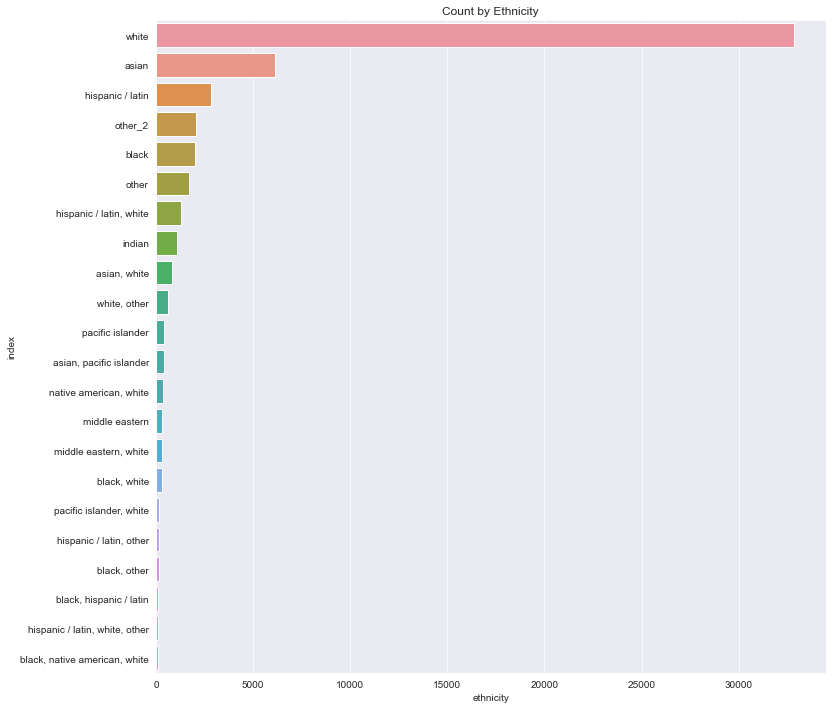

In [32]:
plt.figure(figsize=(12,12))
sns.barplot(x=ethnicity_count_sort['ethnicity'], y=ethnicity_count_sort['index'])
plt.title('Count by Ethnicity')
# plt.savefig('ethinicity.png')

As an alternate analysis, for users stating multiple ethnicities, assign the user to the first group they listed. From the plot below, the alternate analysis does not change the results substantially: again, 'white', 'asian', 'hispanic', and 'black' are roughly in the same proportions as before.

              index  first_eth
0             white      33472
1             asian       8205
2  hispanic / latin       4379
3             black       3071
4             other       1706
5            indian       1196
6    middle eastern        811
7  pacific islander        717
8   native american        709


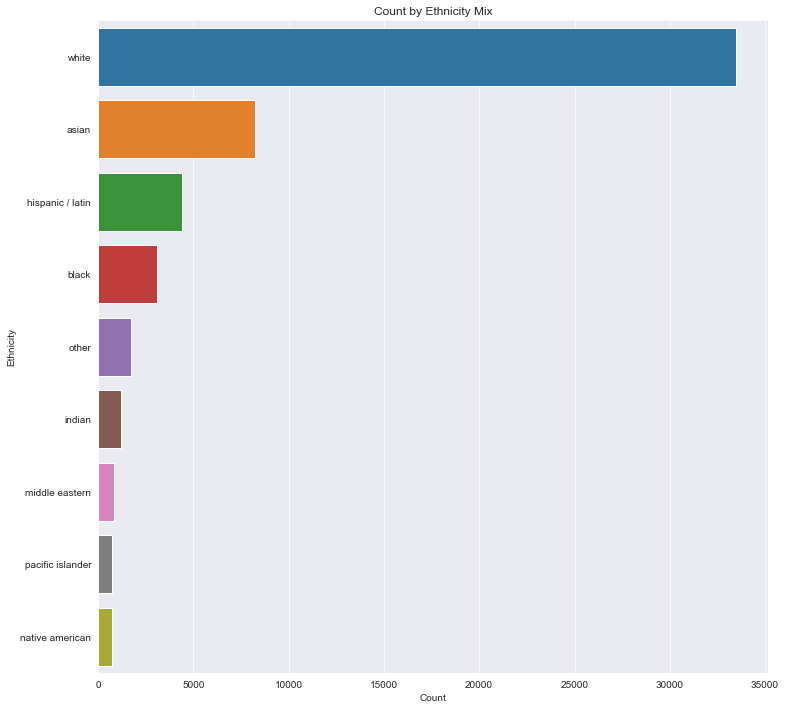

In [33]:
# Now check mixed ethnicity: for single ethnicity, keep as is. For multiethnicity, keep first entry then add 'mix'

profiles_eth2 = profiles.dropna(subset=['ethnicity']).copy()

profiles_eth2['first_eth'] = profiles_eth2.apply(lambda row: (row['ethnicity'].split(','))[0], axis = 1)
eth_count_sort = (profiles_eth2['first_eth'].value_counts().reset_index())
print(eth_count_sort)
plt.figure(figsize=(12,12))
sns.barplot(x=eth_count_sort['first_eth'], y=eth_count_sort['index'])
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Count by Ethnicity Mix')
plt.savefig('ethinicity.png')
    
# profiles_eth2['first_eth'] = profiles_eth2.apply(lambda row: row['ethnicity'] if len(row['ethnicity'].split(',')) == 1 \
#                                                else (row['ethnicity'].split(','))[0] + ' mix', axis=1)
# eth_count_sort = (profiles_eth2['first_eth'].value_counts().reset_index())
# print(eth_count_sort)
# plt.figure(figsize=(12,12))
# sns.barplot(x=eth_count_sort['first_eth'], y=eth_count_sort['index'])
# plt.title('Count by Ethnicity Mix')
# # plt.savefig('ethinicity.png')


### Education

A significant number of respondents (57%) are enrolled in or graduated from college or univeristy. Another 20% are enrolled in or graduated from a master program. 

                                index  education    percent
23         dropped out of high school   0.001913   0.191305
25             working on high school   0.001632   0.163172
24                        high school   0.001801   0.180052
5          graduated from high school   0.026783   2.678270
19    dropped out of two-year college   0.003582   0.358228
8         working on two-year college   0.020143   2.014329
17                   two-year college   0.004164   0.416370
4     graduated from two-year college   0.028715   2.871451
9   dropped out of college/university   0.018662   1.866162
2       working on college/university   0.107131  10.713080
11                 college/university   0.015023   1.502307
0   graduated from college/university   0.449360  44.936044
20     dropped out of masters program   0.002626   0.262575
3          working on masters program   0.031565   3.156533
21                    masters program   0.002551   0.255073
1      graduated from masters program   

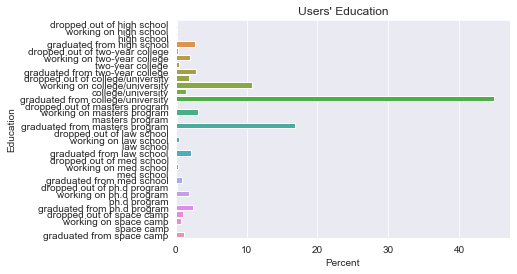

In [34]:

profiles['education'] = pd.Categorical(profiles['education'],\
                        ['dropped out of high school', 'working on high school', 'high school', 'graduated from high school', \
                         'dropped out of two-year college', 'working on two-year college', 'two-year college', 'graduated from two-year college', \
                         'dropped out of college/university', 'working on college/university', 'college/university', 'graduated from college/university', \
                         'dropped out of masters program', 'working on masters program', 'masters program', 'graduated from masters program', \
                         'dropped out of law school', 'working on law school', 'law school', 'graduated from law school', \
                         'dropped out of med school', 'working on med school', 'med school', 'graduated from med school', \
                         'dropped out of ph.d program', 'working on ph.d program', 'ph.d program', 'graduated from ph.d program', \
                         'dropped out of space camp', 'working on space camp', 'space camp', 'graduated from space camp'], ordered=True)
profiles_ed = profiles['education'].value_counts(normalize=True).reset_index()
profiles_ed['percent'] =  profiles_ed.apply(lambda row: row['education']*100, axis =1)
print(profiles_ed.sort_values(by= 'index'))

sns.barplot(data=profiles_ed, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Education')
plt.title('Users\' Education')
plt.savefig('education.png')

### Job

<AxesSubplot:xlabel='count', ylabel='job'>

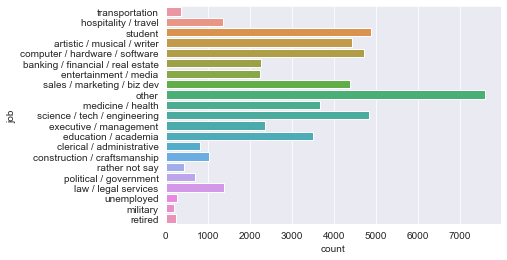

In [51]:
sns.countplot(data=profiles, y = 'job')

### Income

Note that 'null values' for income are given as '-1'. These could be non-responses or non-income (unemployed, students, and retirees) and account for over 80.8% of the entries. These entries are to be dropped so that metrics via `.describe()` can be found. 

The number of null values in the column "income" are 48442 or 80.81%
(11504, 31)
count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64


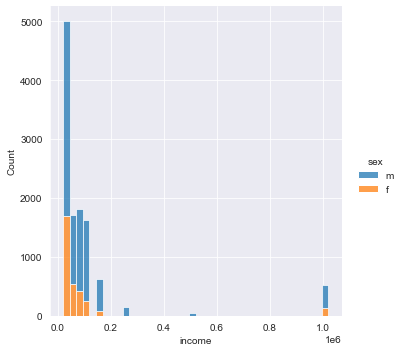

In [69]:
count_nulls_inc = (profiles[profiles['income'] == -1])['income'].count()
print(f'The number of null values in the column "income" are {count_nulls_inc} or {round((count_nulls_inc/len(profiles)*100),2)}%')
profiles_inc = profiles[profiles['income'] != -1]
print(profiles_inc.shape)
print(profiles_inc['income'].describe())
sns.displot(data=profiles_inc, x='income', hue='sex', kind='hist', binwidth = 25000, multiple='stack')

### Age

Mean age of all users is about 32 years, and ages range from 18 to 110. The 110 appears to be an outlier.  

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64


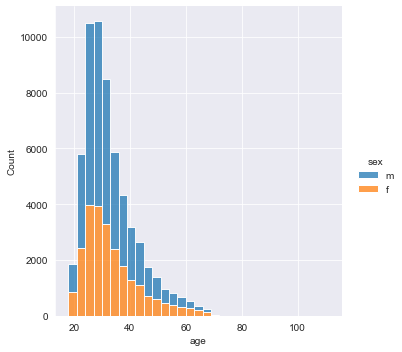

In [56]:
print(profiles['age'].describe())
sns.displot(data=profiles, x='age',kind='hist', binwidth=3, hue='sex', multiple='stack')

### Height

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64


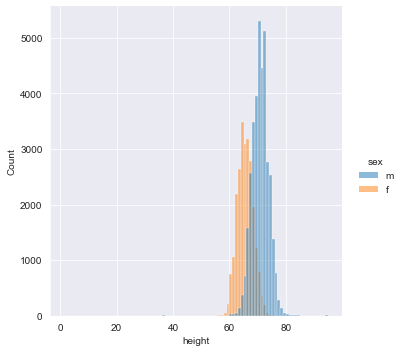

In [49]:
print(profiles['height'].describe())
sns.displot(data=profiles, x='height',kind='hist', binwidth=1, hue='sex')

### Body Type

Data below shows that at large majority of users call their body type 'average' (26-27%) or 'fit' (21-25%). For males, an
additional 28.6% call their body type 'athletic' while for females a similar percentage call their body type 'athletic' or 'curvy' (28.8%). Females were more likely to use the terms 'curvy' or 'full-figured' and males were more likely to use the term 'athletic'.

In [36]:
# Drop nulls and then categorize data

profiles_body = profiles.dropna(subset=['body_type']).copy()
profiles_body['body_type'] = pd.Categorical(profiles_body['body_type'], \
                                            ['rather not say', 'skinny', 'thin', 'average', 'fit', 'curvy', 'athletic', \
                                             'jacked', 'a little extra', 'overweight', 'full figured', 'used up'], ordered=True)
print(profiles_body['body_type'].sort_values().value_counts())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


In [37]:
body_sex_count = profiles_body.groupby(['body_type', 'sex'])['status'].count().reset_index()
total_male = profiles_body['sex'].value_counts()[0]
total_female = profiles_body['sex'].value_counts()[1]
print(total_male, total_female)
body_sex_count['percent'] = body_sex_count.apply(lambda row: row['status']/total_male*100 if row['sex'] == 'm' else row['status']/total_female*100, axis = 1)
print(body_sex_count)

33236 21414
         body_type sex  status    percent
0   rather not say   f     106   0.495003
1   rather not say   m      92   0.276808
2           skinny   f     601   2.806575
3           skinny   m    1176   3.538332
4             thin   f    2469  11.529840
5             thin   m    2242   6.745697
6          average   f    5620  26.244513
7          average   m    9032  27.175352
8              fit   f    4431  20.692071
9              fit   m    8280  24.912745
10           curvy   f    3811  17.796768
11           curvy   m     113   0.339993
12        athletic   f    2309  10.782666
13        athletic   m    9510  28.613552
14          jacked   f     129   0.602410
15          jacked   m     292   0.878565
16  a little extra   f     821   3.833940
17  a little extra   m    1808   5.439884
18      overweight   f     145   0.677127
19      overweight   m     299   0.899627
20    full figured   f     870   4.062763
21    full figured   m     139   0.418221
22         used up   f

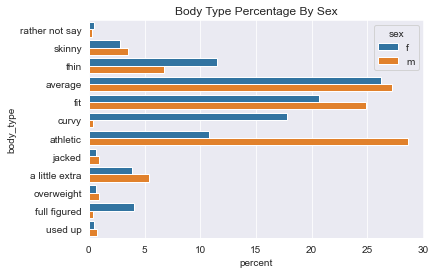

In [38]:
# Plot body type sorted by sex by percent

sns.barplot(x=body_sex_count['percent'], y=body_sex_count['body_type'], hue= body_sex_count['sex'])
plt.title('Body Type Percentage By Sex')
plt.savefig('body_type_sex.png')
plt.show()

### Diet

The diet preference for the vast majority of users is 'anything' (78.4%). A smaller number is 'vegetarian' (14%), 'other' (5%), 'vegan' (2%), 'kosher' (0.3%), and 'halal' (0.2%).

In [39]:
profiles_diet = profiles.dropna(subset=['diet']).copy()


profiles_diet['diet_overall'] = profiles_diet.diet.str.split().str.get(-1)
diet_overall = profiles_diet['diet_overall'].value_counts().sort_index().to_frame().reset_index()
diet_overall.columns = ['diet', 'count']
diet_overall['percent'] = diet_overall['count'].apply(lambda x: x/ len(profiles_diet['diet_overall'])*100)

print((diet_overall.sort_values(by='percent')))


         diet  count    percent
1       halal     77   0.216590
2      kosher    115   0.323479
4       vegan    702   1.974628
3       other   1790   5.035020
5  vegetarian   4986  14.024922
0    anything  27881  78.425361


### Location

The first 50 most cited locations are all in the Bay Area and account for 99.1% of all users. I.e. this data represents OkCupid users that are nearly exclusively from the Bay Area. It is unclear whether the `location` data will provide useful information to the machine learning model.

In [40]:

counts_loc = (profiles['location'].value_counts().head(50).reset_index())
print(counts_loc)
count_loc = counts_loc['location'].sum()
print('The first 50 most-cited locations are all in the Bay Area and account for '\
      + str(count_loc) + ' of 59946 users, or ' + str(round((count_loc/59946*100),1)) + '% of all users.')


                              index  location
0         san francisco, california     31064
1               oakland, california      7214
2              berkeley, california      4212
3             san mateo, california      1331
4             palo alto, california      1064
5               alameda, california       910
6            san rafael, california       755
7               hayward, california       747
8            emeryville, california       738
9          redwood city, california       693
10            daly city, california       681
11          san leandro, california       651
12         walnut creek, california       644
13              vallejo, california       558
14           menlo park, california       479
15             richmond, california       424
16  south san francisco, california       416
17        mountain view, california       384
18               novato, california       369
19           burlingame, california       361
20        pleasant hill, californi

### Offspring

Over 60% of the respondents do not have kids. 

                                             kid_pref     ratio    percent
3                             doesn&rsquo;t want kids  0.120033  12.003281
6   doesn&rsquo;t have kids, and doesn&rsquo;t wan...  0.046422   4.642198
0                             doesn&rsquo;t have kids  0.310027  31.002666
1        doesn&rsquo;t have kids, but might want them  0.158909  15.890917
2             doesn&rsquo;t have kids, but wants them  0.146196  14.619643
5                                           has a kid  0.077138   7.713758
8              has a kid, but doesn&rsquo;t want more  0.011277   1.127742
9                      has a kid, and might want more  0.009473   0.947304
13                          has a kid, and wants more  0.002912   0.291163
11                                    might want kids  0.007464   0.746360
10                                         wants kids  0.009227   0.922698
4                                            has kids  0.077220   7.721960
7               has kids,

Text(0.5, 1.0, "Users' Kids")

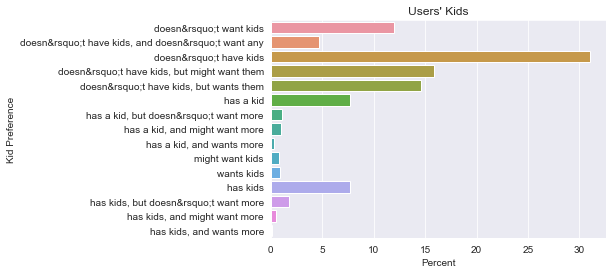

In [75]:
profiles['offspring'] = pd.Categorical(profiles['offspring'],\
                            ['doesn&rsquo;t want kids', 'doesn&rsquo;t have kids, and doesn&rsquo;t want any',\
                             'doesn&rsquo;t have kids', 'doesn&rsquo;t have kids, but might want them', \
                             'doesn&rsquo;t have kids, but wants them', 'has a kid', 'has a kid, but doesn&rsquo;t want more', \
                             'has a kid, and might want more', 'has a kid, and wants more', 'might want kids', 'wants kids',\
                             'has kids', 'has kids, but doesn&rsquo;t want more', 'has kids, and might want more', \
                             'has kids, and wants more'], ordered=True)
profiles_kids = profiles['offspring'].value_counts(normalize=True).reset_index()
profiles_kids.rename(columns = {'index': 'kid_pref', 'offspring': 'ratio'}, inplace=True)
profiles_kids['percent'] = profiles_kids.apply(lambda row: row['ratio']*100, axis =1) 
print(profiles_kids.sort_values(by='kid_pref'))

sns.barplot(data=profiles_kids, x='percent', y='kid_pref')
plt.xlabel('Percent')
plt.ylabel('Kid Preference')
plt.title('Users\' Kids')
# plt.savefig('kids.png')

### Pets

Among respondents, 21.2% has at least one dog and 18.2% has at least one cat. These number include 3.7% that have both. Only 1.4%  express a dislike of dogs, and 7.2% express a dislike of cats. 

The percentage of responses that include "has dogs" is 21.2%
The percentage of responses that include "has cats" is 18.2%
The percentage of responses that include "has dogs and has cats" is 3.7%
The percentage of responses that include "dislikes dogs" is 1.4%
The percentage of responses that include "dislikes cats" is 7.2%
                     pet_preference     ratio    percent
12                    dislikes cats  0.003048   0.304809
14                    dislikes dogs  0.001099   0.109931
11  dislikes dogs and dislikes cats  0.004897   0.489694
1                        likes dogs  0.180487  18.048720
5      likes dogs and dislikes cats  0.050693   5.069332
0         likes dogs and likes cats  0.370119  37.011868
3                          has dogs  0.103285  10.328545
9        has dogs and dislikes cats  0.013791   1.379138
4           has dogs and likes cats  0.058289   5.828857
6             has dogs and has cats  0.036827   3.682698
2           likes dogs and has cats  0.107758  1

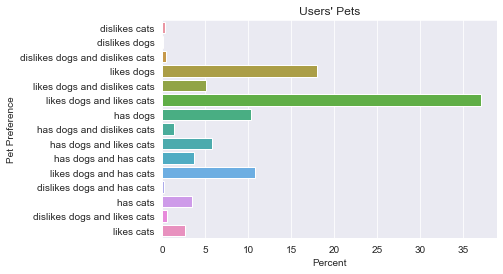

In [41]:

profiles['pets'] = pd.Categorical(profiles['pets'],\
                        ['dislikes cats', 'dislikes dogs', 'dislikes dogs and dislikes cats', 'likes dogs', \
                         'likes dogs and dislikes cats', 'likes dogs and likes cats', 'has dogs', \
                         'has dogs and dislikes cats', 'has dogs and likes cats', 'has dogs and has cats',\
                         'likes dogs and has cats', 'dislikes dogs and has cats', 'has cats', \
                         'dislikes dogs and likes cats', 'likes cats'], ordered=True)
profiles_pets = profiles['pets'].value_counts(normalize=True).reset_index()
profiles_pets.rename(columns = {'index':'pet_preference', 'pets': 'ratio'}, inplace=True)
profiles_pets['percent'] =  profiles_pets.apply(lambda row: row['ratio']*100, axis =1)

pet_percent_count = 0
pet_phrases = ['has dogs', 'has cats', 'has dogs and has cats', 'dislikes dogs', 'dislikes cats']
for phrase in pet_phrases:
    for i in range(len(profiles_pets)):
        if (profiles_pets['pet_preference'][i].__contains__(phrase)):
            pet_percent_count += profiles_pets['percent'][i]
    print(f'The percentage of responses that include "{phrase}" is {round(pet_percent_count,1)}%')
    pet_percent_count = 0


print(profiles_pets.sort_values(by= 'pet_preference'))

sns.barplot(data=profiles_pets, x='percent', y='pet_preference')
plt.xlabel('Percent')
plt.ylabel('Pet Preference')
plt.title('Users\' Pets')
plt.savefig('pets.png')

##  Natural Language Processing

Since there are ten column containing short answers, this is an opportunity to test natural language processing. Although the answers themselves are relatively short the natural language processing model may be somewhat able to make accurate predictions.

Use scikit-learn's bag-of-words and Naive Bayes classifier to determine the author of a writing selection.

- **Goal** There are 10 essay-type answers that each user submitted when creating their profile. The goal will be to select 10 users at random and use a random selection of 8 of their essay answers in order to train the model. Then given  9 and 10th essays, see how accurately the model can guess the correct user.
- **Data** As noted, data will be `essay0` through `essay9` from 10 random users. 
- **Analysis** The analysis will use scikit-learn's bag-of-words and Naive Bayes classifier. The 10 random users will need to have answered all 10 essay questions so that we don't inadvertently have NaNs to clog up the model. 

In [42]:
# Copy profiles dataset, and drop all rows with any null values in any of the essay questions. 

profiles_essays = profiles[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', \
                            'essay5', 'essay6', 'essay7', 'essay8', 'essay9',]].dropna()

# Check remaining users. NOTE- from .shape, 29866 users answered all ten essays. OK to proceed. 
print(profiles_essays.shape)

(29866, 10)


In [43]:
# Select 10 random users using built-in `.sample` method, then for each select 9 essays to train the model. We might be 
# able to use .sample again to select random columns, but instead use random indexes so that we can keep track. Use the
# remaining essay to predict who the author is.


training_essays = []
test_essays = []
user_labels = []
test_labels = []
ten_users = profiles_essays.sample(n=10).reset_index(drop=True)
print(ten_users.shape)
for i in range(len(ten_users)):
    rand_index = np.random.randint(10, size = 1)
#     if rand_index[0] == rand_index[1]:
#         rand_index[1] = (rand_index[0] + 3)%10
    
    for j in range(len(ten_users.columns)):        
        if j not in rand_index:
            training_essays.append(ten_users.iloc[i, j])
            user_labels.append(i)
        else:
            test_essays.append(ten_users.iloc[i, j])
            test_labels.append(i)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

bow_vectorizer = CountVectorizer()
user_vectors = bow_vectorizer.fit_transform(training_essays)

user_classifier = MultinomialNB()
user_classifier.fit(user_vectors, user_labels)

correct = 0
for i in range(10):
    test_vector = bow_vectorizer.transform([test_essays[i]])
    prediction = user_classifier.predict(test_vector)
    if prediction == i:
        print(f'For index {i} predicted {prediction}: MATCH!!!')
        correct += .1        
    else:
        print(f'For index {i} predicted {prediction}')
    
print(f'Correct ratio is: {correct}')

(10, 10)
For index 0 predicted [0]: MATCH!!!
For index 1 predicted [2]
For index 2 predicted [2]: MATCH!!!
For index 3 predicted [7]
For index 4 predicted [4]: MATCH!!!
For index 5 predicted [7]
For index 6 predicted [7]
For index 7 predicted [2]
For index 8 predicted [7]
For index 9 predicted [2]
Correct ratio is: 0.30000000000000004


### Natural Language Processing

- **Conclusions** After running the classifier ten times, the classifier consistently made the correct classification an average of 1.8 times out of 10, which is *slightly* better performance than random guessing which would be a correct classification 1 time out of ten on average. Of course, for better classifications the solution would be to train the model with far more data than the ten essays here. 

## Machine Learning

### Check and Prepare Data

Check data for null values and missing data. Using `.isnull()` gives an indication of the scope of null values. Note that `income` has zero null values listed, but from the data review above we know that over 80% of the data is coded '-1' which can be interpreted as a null value itself. 

In [44]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

#### Preprocessing and Selecting Variables

The variables selected for the machine learning model are those where there might be a correlation with religious beliefs. Note that we will first check correlation with the variable `religion`, then with the `belief_overall` variable (i.e. where the user input any belief without regard to their seriousness), then with the `belief` variable (i.e. where the user indicated a seriousness of belief without regard to the belief itself).

The initial variables to include are those which may be useful in predicting religion or religious beliefs in and of themselves. The possible additional variable are those which may be useful in predicting and these will be added one by one as needed.

The variables to be included are: 
- `diet`
- `drinks`
- `drugs`
- `ethnicity` (cleaned for first listed ethnicity)
- `smokes`

The possible additional variables to include are:
- `body_type` 
- `orientation`
- `sign` after cleaning/ recategorizing
- `speaks` after cleaning/recategorizing
- `job`

Variables to exclude due to irrelelvance or excessive null values are:
- `age`
- `height`
- `income`
- `sex`
- `pets`
- `offspring`
- `essay0` - `essay9`

#### History

- 1st run unsuccessful. Next run address imbalances and add  `orientation` plus cleaned `sign`. 
- 2nd run better but still unsuccessful. Next run 

In [325]:

# columns = ['diet', 'drinks', 'drugs', 'ethnicity', 'smokes', 'religion']
# columns = ['age', 'diet', 'drinks', 'drugs', 'ethnicity', 'smokes', 'orientation', 'sign', 'religion']
columns = ['age', 'diet', 'drinks', 'drugs', 'ethnicity', 'smokes', 'orientation', 'sign', 'pets', 'offspring', 'religion']
df = profiles[columns].dropna().copy()
print(df.shape)


# 1st run - 18436 lines remaining
# 2nd run - 16509 lines remaining

(7742, 11)


After removing nulls, dataset drops to a little over 18 thousand entries.

In [326]:
# Clean religion variable for overall religious choice (i.e. not considering how serious the user is about the choice)
df['religion'] = df['religion'].str.split().str.get(0)

# Clean age variable
df['age'] = np.where((df['age'] < 25), '18 to 24', 
            np.where((df['age'] < 30), '25 to 29',
            np.where((df['age'] < 35), '30 to 34',
            np.where((df['age'] < 40), '35 to 39',
            np.where((df['age'] < 50), '40 to 49',  
            np.where((df['age'] < 60), '50 to 59', 'over 60'))))))
print(df['age'].value_counts())


# Clean diet variable for overall diet choice
# df['diet'] = df.diet.str.split().str.get(-1)

# Clean ethnicity variable for first listed ethnicity.
df['ethnicity'] = df.apply(lambda row: (row['ethnicity'].split(','))[0], axis = 1)

# Clean sign for whether or not the user takes astrology seriously.
# This function and the lambda immediately below sorts 'sign' into two categories: 'serious' or 'not serious'
def check_for_text(str):
    if (str.__contains__('fun') | str.__contains__('but')):
        return True

df['sign'] = df.apply(lambda row: 'not serious' if check_for_text(row['sign']) else 'serious', axis = 1)
print(df['sign'].value_counts())


25 to 29    1960
18 to 24    1579
30 to 34    1412
40 to 49    1104
35 to 39     843
50 to 59     579
over 60      265
Name: age, dtype: int64
not serious    6524
serious        1218
Name: sign, dtype: int64


In [327]:
# For all except the last column (i.e. religion)
for column in columns[:-1]:
    df = pd.get_dummies(df, columns=[column], prefix=[column])

In [328]:
df.head()

religion  age_18 to 24  age_25 to 29  age_30 to 34  age_35 to 39  \
0    agnosticism             1             0             0             0   
1    agnosticism             0             0             0             1   
7   christianity             0             0             1             0   
14   catholicism             0             1             0             0   
19   catholicism             0             0             1             0   

    age_40 to 49  age_50 to 59  age_over 60  diet_anything  diet_kosher  ...  \
0              0             0            0              0            0  ...   
1              0             0            0              0            0  ...   
7              0             0            0              0            0  ...   
14             0             0            0              0            0  ...   
19             0             0            0              0            0  ...   

    offspring_has a kid  offspring_has a kid, but doesn&rsquo;t want more  \
0                     0                                                 0   
1                     0                                                 0   
7                     0                                                 0   
14                    0                                                 0   
19                    0                                                 0   

    offspring_has a kid, and might want more  \
0                                          0   
1                                          0   
7                                          0   
14                                         0   
19                                         0   

    offspring_has a kid, and wants more  offspring_might want kids  \
0                                     0                          0   
1                                     0                          0   
7                                     0                          0   
14                                    0                          0   
19                                    0                          0   

    offspring_wants kids  offspring_has kids  \
0                      0                   0   
1                      0                   0   
7                      0                   0   
14                     0                   0   
19                     0                   0   

    offspring_has kids, but doesn&rsquo;t want more  \
0                                                 0   
1                                                 0   
7                                                 0   
14                                                0   
19                                                0   

    offspring_has kids, and might want more  \
0                                         0   
1                                         0   
7                                         0   
14                                        0   
19                                        0   

    offspring_has kids, and wants more  
0                                    0  
1                                    0  
7                                    0  
14                                   0  
19                                   0  

[5 rows x 83 columns]

#### Label Imbalance

There is label imbalance in the `religion` column. The first four to five labels are similarly sized; however, the remaining four to five labels are noticeably less. This imbalance can seriously impact the accuracy of the machine learning model. Options for addressing this imbalance include:

- Downsampling the majority class- i.e. deleting rows until the labels are more or less equal in number. This is a poor choice here since we would be deleting nearly all of our data for the other labels to match the 'islam' counts.
- Upsampling the minority class- this involves increasing the data in the minority class by either direct copying or copying with limited noise. THis can be done using sklearn.util's resample and SMOTE (synthetic minority oversampling technique).
- Artificially group minority classes into one class closer in balance to the majority classes.
- Using tree-based algorithms, since these often perform well with an imbalanced dataset.
- (Other approaches available)


In [329]:
df.religion.value_counts()

agnosticism     1695
other           1607
atheism         1355
christianity    1196
catholicism      965
judaism          465
buddhism         376
hinduism          54
islam             29
Name: religion, dtype: int64

####  Address Label Imbalance


In [330]:
# 2nd run: Group 'judaism', 'buddhism', 'hinduism', and 'islam' into 'other_2' variable

# def check_for_text(str):
#     if (str.__contains__('judaism') | str.__contains__('buddhism') | str.__contains__('hinduism') | str.__contains__('islam')):
#         return True

# df['religion'] = df.apply(lambda row: 'other_2' if check_for_text(row['religion']) else row['religion'], axis = 1)
# print(df['religion'].value_counts())

# 3rd run: apply resampling
from sklearn.utils import resample

df_maj = df[df['religion'] == 'agnosticism']
df_min1 = df[df['religion'] == 'other']
df_min2 = df[df['religion'] == 'atheism']
df_min3 = df[df['religion'] == 'christianity']
df_min4 = df[df['religion'] == 'catholicism']
df_min5 = df[df['religion'] == 'judaism']
df_min6 = df[df['religion'] == 'buddhism']
df_min7 = df[df['religion'] == 'hinduism']
df_min8 = df[df['religion'] == 'islam']

df_min1_up = resample(df_min1, replace=True, n_samples = (3501), random_state=88)
df_min2_up = resample(df_min2, replace=True, n_samples = (3501), random_state=88)
df_min3_up = resample(df_min3, replace=True, n_samples = (3501), random_state=88)
df_min4_up = resample(df_min4, replace=True, n_samples = (3501), random_state=88)
df_min5_up = resample(df_min5, replace=True, n_samples = (3501), random_state=88)
df_min6_up = resample(df_min6, replace=True, n_samples = (3501), random_state=88)
df_min7_up = resample(df_min7, replace=True, n_samples = (3501), random_state=88)
df_min8_up = resample(df_min8, replace=True, n_samples = (3501), random_state=88)

df_upsampled = pd.concat([df_maj, df_min1_up, df_min2_up, df_min3_up, df_min4_up, df_min5_up, df_min6_up, df_min7_up, df_min8_up,])
print(len(df_upsampled))

29703


#### Split Data into Train-Test Sets

In [331]:
from sklearn.model_selection import train_test_split

col_length = len(df_upsampled.columns)

X = df_upsampled.iloc[:, 1:col_length]
y = df_upsampled.iloc[:, 0:1]

split_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=0)

# Convert into 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

### Model Building

#### Evaluation Metrics

- Accuracy: Correct values divided by total values  (TP + TN) / (TP + FP + TN + FN)
- Precision: True positives divided by the total positives  TP / (TP + FP)
- Recall: True positives divided by true positive plus false negative   TP / (TP + FN)
- F1 Score: blend of precision and recall TP / (TP + 1/2 * (FP + FN))

#### Logistic Regression using Balanced Data

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))
# Shouldn't above be lr_model.predict(X_test)???
# and classification_report(y_test, lr_predictions)???

              precision    recall  f1-score   support

 agnosticism       0.07      0.00      0.00       420
     atheism       0.40      0.44      0.42       892
    buddhism       0.36      0.38      0.37       862
 catholicism       0.36      0.33      0.34       888
christianity       0.32      0.29      0.30       861
    hinduism       0.84      0.94      0.89       907
       islam       0.87      0.96      0.91       883
     judaism       0.35      0.56      0.43       863
       other       0.28      0.18      0.22       850

    accuracy                           0.48      7426
   macro avg       0.43      0.45      0.43      7426
weighted avg       0.45      0.48      0.46      7426



C:\Users\twill\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logisitic regression failed to converge and thus should not be used without editing.

#### K Neighbors Classifier using Balanced Data

In [333]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn_predictions = knn_model.predict(X_train)

print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

 agnosticism       0.62      0.28      0.39      1275
     atheism       0.75      0.80      0.77      2609
    buddhism       0.82      0.95      0.88      2639
 catholicism       0.74      0.80      0.77      2613
christianity       0.75      0.73      0.74      2640
    hinduism       0.96      1.00      0.98      2594
       islam       0.98      1.00      0.99      2618
     judaism       0.74      0.87      0.80      2638
       other       0.85      0.62      0.72      2651

    accuracy                           0.81     22277
   macro avg       0.80      0.78      0.78     22277
weighted avg       0.81      0.81      0.80     22277



#### Decision Trees

In [334]:
from sklearn.tree import DecisionTreeClassifier


cart_model = DecisionTreeClassifier().fit(X_train, y_train)
cart_predictions = cart_model.predict(X_train)
print(cart_model.get_depth())


# 1st run depth 34
# 2nd run depth 32-33
# 3rd run depth 33
# post 3rd run depth 32

41


In [335]:
print(classification_report(y_train, cart_predictions))

# 1st run accuracy f1 = .37
# 2nd run accuracy f1 = .43
# 3rd run accuracy f1 = .55
# post 3rd run accuracy f1 = .64

              precision    recall  f1-score   support

 agnosticism       0.94      0.76      0.84      1275
     atheism       0.90      0.89      0.90      2609
    buddhism       0.90      0.98      0.94      2639
 catholicism       0.86      0.86      0.86      2613
christianity       0.88      0.84      0.86      2640
    hinduism       0.98      1.00      0.99      2594
       islam       0.99      1.00      0.99      2618
     judaism       0.80      0.92      0.86      2638
       other       0.96      0.86      0.91      2651

    accuracy                           0.91     22277
   macro avg       0.91      0.90      0.90     22277
weighted avg       0.91      0.91      0.91     22277



In [336]:
cart_cm = confusion_matrix(y_train, cart_predictions)
cart_labels = cart_model.classes_

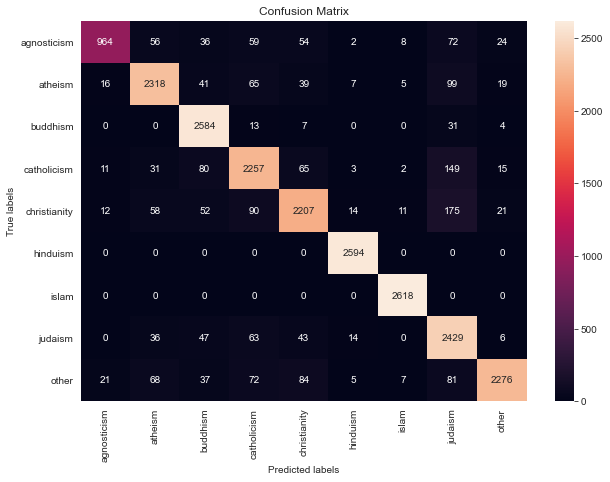

In [337]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

### Comments

- 1st run: Results for first run of models using decision tree classifiers were of limited accuracy and high depth of tree - i.e. overfitting. Therefore, this first run is not successful. 
- 2nd run: Results are slightly improved using aggregated minor labels and additional variables. Depth of tree is slightly less so overall this is an improvement, but still not adequate.
- 3rd run: results are improved still, this time using upsampled minor labels. Depth of tree is about the same.
- Post 3rd run: results are further improved by adding 'age' variable.

In [338]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=88)
results = cross_val_score(cart_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print('Baseline: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

[0.80677738 0.80498205 0.80157127 0.7993266  0.80650954]
Baseline: 80.38% (0.29%)


####  Post 3rd run baseline results above at 52.8%. Rerun tree model to a max depth of 20

In [339]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)
cart_predictions20 = cart_model20.predict(X_train)
print(classification_report(y_train, cart_predictions20))

              precision    recall  f1-score   support

 agnosticism       0.83      0.27      0.41      1275
     atheism       0.64      0.64      0.64      2609
    buddhism       0.67      0.85      0.75      2639
 catholicism       0.53      0.67      0.60      2613
christianity       0.67      0.47      0.55      2640
    hinduism       0.97      1.00      0.99      2594
       islam       0.98      1.00      0.99      2618
     judaism       0.53      0.69      0.60      2638
       other       0.71      0.52      0.60      2651

    accuracy                           0.70     22277
   macro avg       0.73      0.68      0.68     22277
weighted avg       0.72      0.70      0.70     22277



In [340]:
results20 = cross_val_score(cart_model20, X_train, y_train, cv=kfold, scoring='accuracy')

print(results20)
print('Baseline: %.2f%% (%.2f%%)' % (results20.mean()*100, results20.std()*100))

[0.64587074 0.63891382 0.63860831 0.63277217 0.64534231]
Baseline: 64.03% (0.49%)


##### Final Model

The decision tree classifier gives an accuracy of around 64.0%, which is OK and better than KNearestNeighbors. 

In [343]:
knn_predictions_test = knn_model.predict(X_test)
print(classification_report(y_test, knn_predictions_test))

              precision    recall  f1-score   support

 agnosticism       0.27      0.12      0.16       420
     atheism       0.62      0.64      0.63       892
    buddhism       0.74      0.94      0.83       862
 catholicism       0.62      0.69      0.65       888
christianity       0.65      0.59      0.62       861
    hinduism       0.95      1.00      0.97       907
       islam       0.97      1.00      0.99       883
     judaism       0.69      0.83      0.76       863
       other       0.69      0.44      0.54       850

    accuracy                           0.73      7426
   macro avg       0.69      0.69      0.68      7426
weighted avg       0.71      0.73      0.72      7426



In [341]:
cart_predictions20_test = cart_model20.predict(X_test)
print(classification_report(y_test, cart_predictions20_test))

              precision    recall  f1-score   support

 agnosticism       0.25      0.05      0.08       420
     atheism       0.58      0.56      0.57       892
    buddhism       0.62      0.81      0.70       862
 catholicism       0.48      0.60      0.53       888
christianity       0.56      0.38      0.46       861
    hinduism       0.97      1.00      0.98       907
       islam       0.98      1.00      0.99       883
     judaism       0.50      0.68      0.58       863
       other       0.61      0.46      0.52       850

    accuracy                           0.65      7426
   macro avg       0.62      0.62      0.60      7426
weighted avg       0.64      0.65      0.64      7426



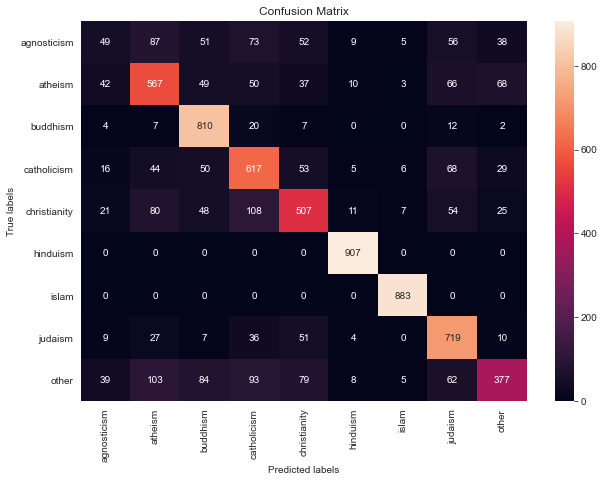

In [344]:
final_cm = confusion_matrix(y_test, knn_predictions_test)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);
plt.savefig('confusion.png')

### Conclusion

The decision tree machine learning method, coupled with upsampling of minor labels, was able to create a model with a baseline score of 64% which is much better than the results from guessing (11%). This is not perfect, but perhaps shows the model can be refined more for better accuracy. 

Is the model overfit? Possibly. Adding more variables continues to increase the accuracy, however this also could be forcing the data.